<a href="https://colab.research.google.com/github/melisa9999/Python-Programming-and-Numerical-Methods-A-Guide-for-Engineers-and-Scientists--SOLUTIONS/blob/main/21.%20Numerical%20Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

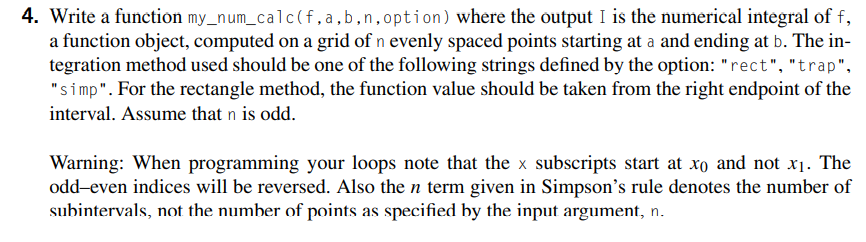

In [2]:
import numpy as np


def my_num_int(a, b, n, option):

    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)

    def F(x):
        return x**2

    #F = lambda x: np.exp(x**2)
    f = F(x)

    if option == 'rect':

        IR = h * sum(f[1::])
        return IR
    elif option == 'trapz':

        IT = (h / 2) * (f[0] + 2 * sum(f[1:n - 1]) + f[n - 1])
        return IT

    else:
        IS = (h / 3) * (f[0] + 2 * sum(f[:n - 2:2]) + 4 * sum(f[1:n - 1:2]) +
                        f[n - 1])
        return IS


# f = lambda x: x**2
print(my_num_int(0, 1, 3, "trapz"))


0.375


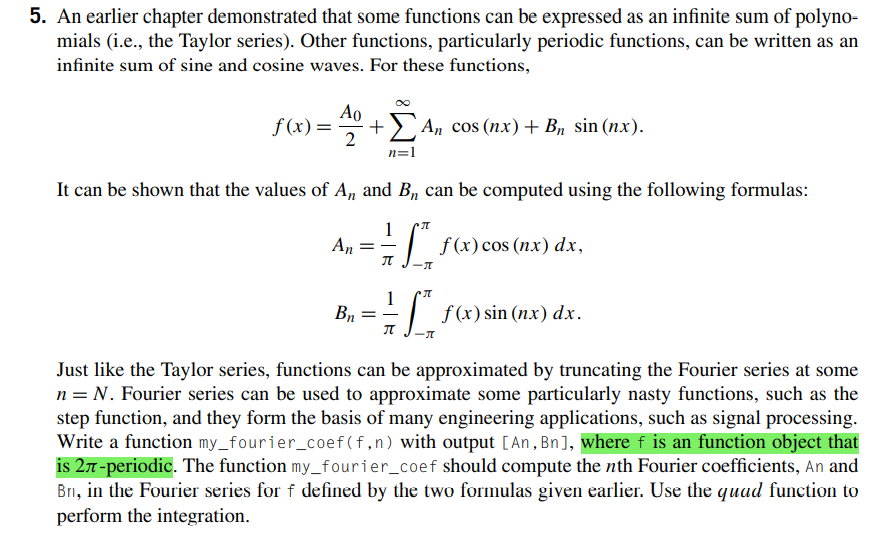

[-4.8591807633470396e-17, -0.10000000000000021]


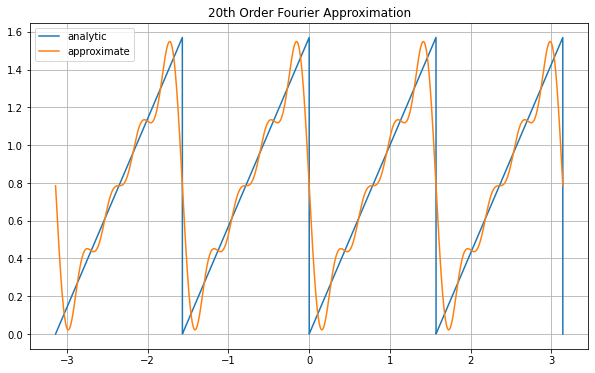

None


In [1]:

from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt



def my_fourier_coef(f, n):
    def F1(x):
        return np.cos(n * x) * f(x)

    def F2(x):
        return np.sin(n * x) * f(x)

    A_n = quad(F1, -np.pi, np.pi)[0]
    B_n = quad(F2, -np.pi, np.pi)[0]
    return [A_n / np.pi, B_n / np.pi]


def results(f, N):
    x = np.linspace(-np.pi, np.pi, 10000)
    [A0, B0] = my_fourier_coef(f, 0)
    y = A0 * np.ones(
        len(x)) / 2  # recordar que este término va fuera de la sumatoria
    for n in range(1, N):
        [An, Bn] = my_fourier_coef(f, n)
        y += An * np.cos(n * x) + Bn * np.sin(
            n * x)  # sumatoria f(x) en términos de senos y cosenos

    plt.figure(figsize=(10, 6))
    plt.plot(x, f(x), label="analytic")
    plt.plot(x, y, label="approximate")
    plt.grid()
    plt.legend()
    plt.title(f"{N}th Order Fourier Approximation")
    plt.show()


#f = lambda x: np.sin(np.exp(x))
def f(x):
    return np.mod(x, np.pi / 2)


#f = lambda x: (x > -np.pi/2) & (x < np.pi/2)
N = 20

print(my_fourier_coef(f, N))
print(results(f, N))
